In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Shakib1126/Rainfall-Prediction-using-Multiple-Linear-Regression/master/austin_weather.csv'
raw_df = pd.read_csv(url)

In [3]:
raw_df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


For returning the number of missing values in the dataset.

In [4]:
raw_df.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

Making a separate array containing all the Dates

In [5]:
date = np.arange(0,2020)
date

array([   0,    1,    2, ..., 2017, 2018, 2019])

In [6]:
raw_df=raw_df.drop(['Date'], axis = 1)

In [7]:
raw_df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,


In [8]:
raw_df=raw_df.drop(["Events"],axis=1)

Number of unique values of the precipitation inches

In [9]:
n=raw_df.PrecipitationSumInches.nunique()

In [10]:
print(n)

114


In [11]:
print(raw_df.PrecipitationSumInches.unique())

['0.46' '0' 'T' '0.16' '0.1' '0.01' '0.06' '0.05' '0.02' '0.15' '0.11'
 '0.08' '0.17' '0.74' '0.07' '0.2' '0.27' '1.34' '2.45' '0.94' '0.14'
 '0.19' '1.56' '1.75' '0.55' '1.49' '0.24' '0.49' '0.31' '3.53' '1.52'
 '0.09' '0.98' '0.22' '0.51' '0.68' '0.35' '3.66' '0.13' '0.21' '0.03'
 '1.42' '0.3' '0.56' '1.51' '0.04' '0.33' '3.33' '0.59' '0.63' '0.76'
 '2.07' '0.4' '0.26' '0.45' '2.17' '1.17' '0.43' '0.41' '0.57' '3.84'
 '0.29' '0.23' '1.12' '0.36' '2.6' '1.41' '5.2' '0.67' '2.66' '1.09'
 '0.93' '0.75' '1.05' '0.79' '4.79' '0.65' '4.93' '0.89' '0.53' '1.03'
 '1.46' '0.25' '1.54' '1.32' '1.33' '2.18' '0.34' '1.19' '1.13' '0.58'
 '0.54' '0.92' '0.77' '2.25' '0.52' '0.18' '1.07' '1.61' '1.06' '2.35'
 '1.79' '1.22' '1.29' '0.37' '0.61' '1.57' '0.86' '0.66' '0.73' '0.71'
 '0.12' '0.47' '1.39']


In [12]:
print(raw_df['PrecipitationSumInches'].value_counts()['T'])

124


Replaced all the Thunderstorm with 0.095 inches of rain

In [13]:
raw_df.loc[raw_df["PrecipitationSumInches"] == "T", "PrecipitationSumInches"] = 0.095

Replaced all the '-' with 0

In [14]:
raw_df = raw_df.replace('-','0', regex=True)

Converted all the columns into float data type

In [15]:
cols = list(raw_df.columns)
for col in cols:
  raw_df[col] = raw_df[col].astype(float)

In [16]:
raw_df['PrecipitationSumInches'].nunique()

114

In [17]:
raw_df['PrecipitationSumInches'].value_counts()

PrecipitationSumInches
0.000    870
0.095    124
0.010     45
0.020     30
0.040     10
        ... 
3.840      1
0.570      1
1.170      1
2.170      1
1.390      1
Name: count, Length: 114, dtype: int64

Used smogn to generated data to remove data imbalance

In [18]:
!pip install smogn
import smogn

In [19]:
raw_df.isnull().sum()

TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
dtype: int64

In [20]:
# use SMOGN
X_s = smogn.smoter(

    ## primary arguments / inputs
    raw_df,                     ## training set  (pandas dataframe)
    'PrecipitationSumInches',                        ## response variable y by name  (string)
    k = 7,                    ## num of neighs for over-sampling  (pos int)
    samp_method = "extreme",  ## % over / under sample  ("balance" or extreme")
    drop_na_col = True,       ## auto drop columns with nan's  (bool)
    drop_na_row = True,       ## auto drop rows with nan's  (bool)
    replace = False,          ## sampling replacement  (bool)

    ## phi relevance function arguments / inputs
    rel_thres = 0.5,          ## relevance threshold considered rare  (pos real)
    rel_method = "auto",      ## relevance method  ("auto" or "manual")
    rel_xtrm_type = "both",   ## distribution focus  ("high", "low", "both")
    rel_coef = 1.5,           ## coefficient for box plot  (pos real)
    rel_ctrl_pts_rg = None    ## input for "manual" rel method  (2d array)

    )

r_index: 100%|##########| 154/154 [00:00<00:00, 289.17it/s]


Updated data and the shape of the data frame

In [21]:
print(raw_df.shape)
print(X_s.shape)
X_s['PrecipitationSumInches'].value_counts()

(1319, 19)
(2020, 19)


PrecipitationSumInches
0.000000    699
0.095000     98
0.010000     31
0.020000     25
0.160000      9
           ... 
0.556638      1
0.605706      1
0.558640      1
0.555122      1
1.390000      1
Name: count, Length: 647, dtype: int64

In [22]:
y = X_s["PrecipitationSumInches"]
x = X_s.drop(["PrecipitationSumInches"],axis=1)

Added a aolumn contating 1

In [23]:
x['constant']=1.0

In [24]:
x

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,constant
0,80.199453,75.099727,70.000000,72.199453,69.549863,67.450137,96.849043,85.000000,72.150957,29.945471,29.857466,29.757466,10.0,7.900273,3.350410,18.250684,8.350410,27.700820,1.0
1,73.504095,70.403276,67.302457,69.100819,65.403276,62.604914,96.596724,87.697543,77.798362,29.937902,29.836894,29.718910,10.0,9.899181,3.201638,17.403276,8.201638,27.403276,1.0
2,78.000000,74.714718,71.429436,72.858872,70.429436,68.000000,98.003026,86.429436,74.570564,29.958649,29.870091,29.798679,10.0,7.570564,2.141128,15.996974,4.996974,28.141128,1.0
3,78.000000,74.408632,70.817263,71.634526,69.817263,68.000000,95.860421,85.817263,75.182737,29.903554,29.805813,29.722158,10.0,8.182737,3.365474,18.139579,7.139579,29.365474,1.0
4,60.174908,56.381181,51.587454,51.000000,48.484317,43.968635,96.000000,75.896863,54.896863,29.929192,29.844035,29.780941,10.0,7.103137,2.000000,12.309410,4.896863,19.309410,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,103.000000,91.000000,78.000000,75.000000,71.000000,63.000000,91.000000,61.000000,31.000000,30.110000,30.030000,29.950000,10.0,10.000000,9.000000,15.000000,7.000000,24.000000,1.0
1313,103.000000,91.000000,78.000000,75.000000,70.000000,61.000000,91.000000,58.000000,25.000000,30.130000,30.030000,29.930000,10.0,10.000000,10.000000,15.000000,6.000000,27.000000,1.0
1315,105.000000,91.000000,76.000000,71.000000,64.000000,55.000000,87.000000,54.000000,20.000000,29.970000,29.900000,29.810000,10.0,10.000000,10.000000,14.000000,5.000000,20.000000,1.0
1316,107.000000,92.000000,77.000000,72.000000,64.000000,55.000000,82.000000,51.000000,19.000000,29.910000,29.860000,29.790000,10.0,10.000000,10.000000,12.000000,4.000000,17.000000,1.0


Calculated mean of all the columns

In [25]:
x2= x.mean(axis=0)
print(x2)

TempHighF                     78.108452
TempAvgF                      69.268975
TempLowF                      59.945839
DewPointHighF                 63.421696
DewPointAvgF                  58.619834
DewPointLowF                  53.111656
HumidityHighPercent           91.909335
HumidityAvgPercent            73.227683
HumidityLowPercent            53.949039
SeaLevelPressureHighInches    30.051189
SeaLevelPressureAvgInches     29.960388
SeaLevelPressureLowInches     29.867259
VisibilityHighMiles            9.941338
VisibilityAvgMiles             8.272050
VisibilityLowMiles             4.192631
WindHighMPH                   13.859932
WindAvgMPH                     4.884208
WindGustMPH                   22.436948
constant                       1.000000
dtype: float64


In [26]:
print(type(x2))

<class 'pandas.core.series.Series'>


Converting x2_df to numpy array so that claculated y mean can be found out

In [27]:
x2_df=x2.to_frame(name='Title')

In [28]:
x2_df

,Title
TempHighF,78.108452
TempAvgF,69.268975
TempLowF,59.945839
DewPointHighF,63.421696
DewPointAvgF,58.619834
DewPointLowF,53.111656
HumidityHighPercent,91.909335
HumidityAvgPercent,73.227683
HumidityLowPercent,53.949039
SeaLevelPressureHighInches,30.051189


In [29]:
x2_mean=np.asarray(x2_df)

In [30]:
x2_mean

array([[78.10845231],
       [69.2689746 ],
       [59.9458394 ],
       [63.4216959 ],
       [58.61983364],
       [53.11165561],
       [91.90933479],
       [73.22768277],
       [53.9490394 ],
       [30.05118859],
       [29.96038809],
       [29.86725886],
       [ 9.94133798],
       [ 8.27204964],
       [ 4.19263062],
       [13.85993163],
       [ 4.88420783],
       [22.43694753],
       [ 1.        ]])

In [31]:
x2_mean.shape

(19, 1)

In [32]:
x2_mean_reshapped=x2_mean.reshape((1,19))

In [33]:
x2_mean_reshapped

array([[78.10845231, 69.2689746 , 59.9458394 , 63.4216959 , 58.61983364,
        53.11165561, 91.90933479, 73.22768277, 53.9490394 , 30.05118859,
        29.96038809, 29.86725886,  9.94133798,  8.27204964,  4.19263062,
        13.85993163,  4.88420783, 22.43694753,  1.        ]])

In [34]:
x_arr = np.asarray(x)
y_arr = np.asarray(y)

For finding out the mean of actual y value

In [35]:
y_arr_mean=np.mean(y_arr)

In [36]:
xT = np.transpose(x_arr)
a = np.dot(xT,x_arr)
inverse = np.linalg.inv(a)
C_X = np.dot(x_arr,np.dot((inverse),xT))
beta = np.dot(inverse,np.dot(xT,y_arr))
Y = np.dot(x_arr,beta)
e = y_arr - Y

In [37]:
beta

array([ 0.08031135, -0.14605846,  0.07397598,  0.01725048, -0.03572106,
        0.01409861, -0.00688948,  0.0084503 ,  0.00486855, -0.81191525,
        1.18472128, -0.37667781,  0.12390525, -0.10737973, -0.01087924,
        0.03978268, -0.02443747,  0.00217533, -0.87731608])

In [38]:
beta.shape

(19,)

In [39]:
beta_reshapped=beta.reshape((19,1))

In [40]:
beta_reshapped

array([[ 0.08031135],
       [-0.14605846],
       [ 0.07397598],
       [ 0.01725048],
       [-0.03572106],
       [ 0.01409861],
       [-0.00688948],
       [ 0.0084503 ],
       [ 0.00486855],
       [-0.81191525],
       [ 1.18472128],
       [-0.37667781],
       [ 0.12390525],
       [-0.10737973],
       [-0.01087924],
       [ 0.03978268],
       [-0.02443747],
       [ 0.00217533],
       [-0.87731608]])

Validation of the fact that the best fit line passes through the means of the response variable and each of the regressor variable from the original data.

In [41]:
y_calc_mean=np.dot(x2_mean_reshapped,beta_reshapped)

In [42]:
y_arr_mean

0.3341593636024416

In [43]:
y_calc_mean

array([[0.33415936]])

From above we can see that y_actual mean is equal to y calculated mean.

563.7341569128614
330.74142305133194
232.9927338787133
0.41330249554973814


Text(0, 0.5, 'Y value')

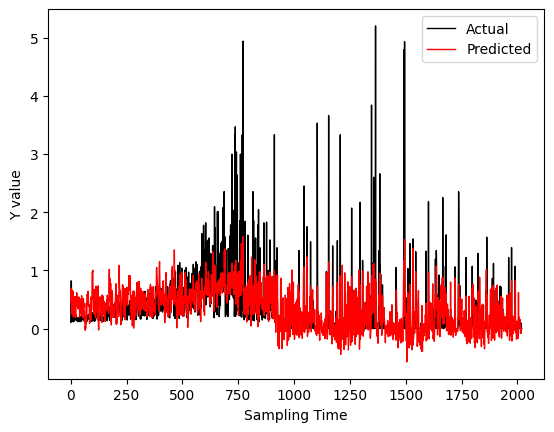

In [44]:
ybar= np.mean(y_arr)
SStotal = np.sum((np.square(y_arr - ybar)))
SSerror = np.sum((np.square(y_arr - Y)))
SSmodel = np.sum((np.square(Y- ybar)))
R2 = SSmodel/SStotal
print(SStotal)
print(SSerror)
print(SSmodel)
print(R2)
plt.plot(date,y_arr,label = "Actual",linewidth=1,color="black")
plt.plot(date,Y,label = "Calc",linewidth=1, color="red")
plt.legend(["Actual","Predicted"])
plt.xlabel("Sampling Time")
plt.ylabel("Y value")

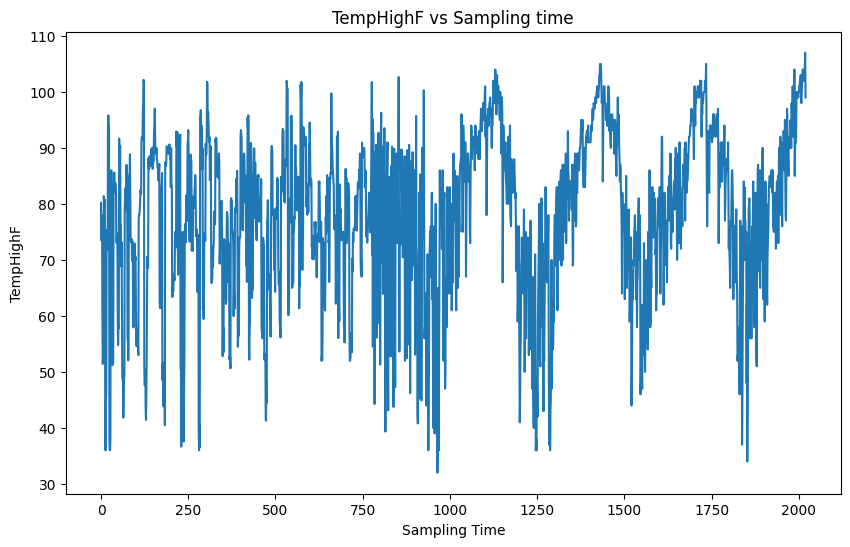

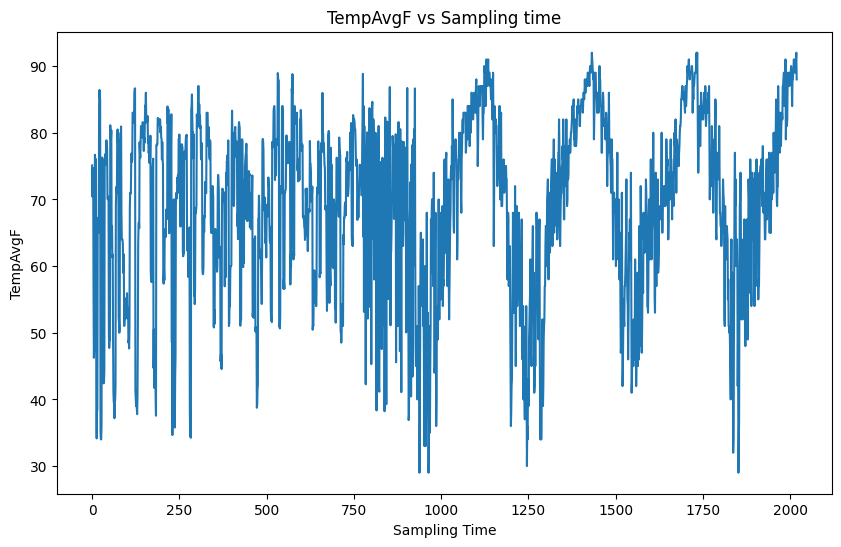

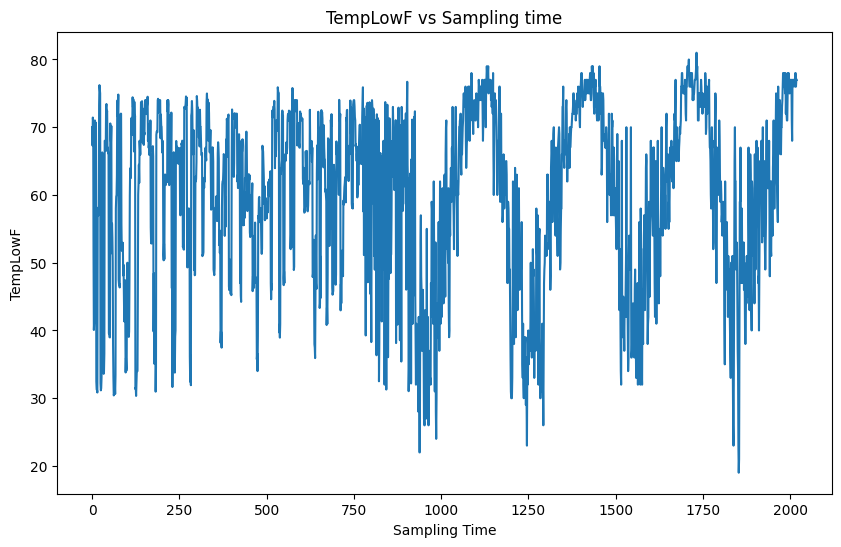

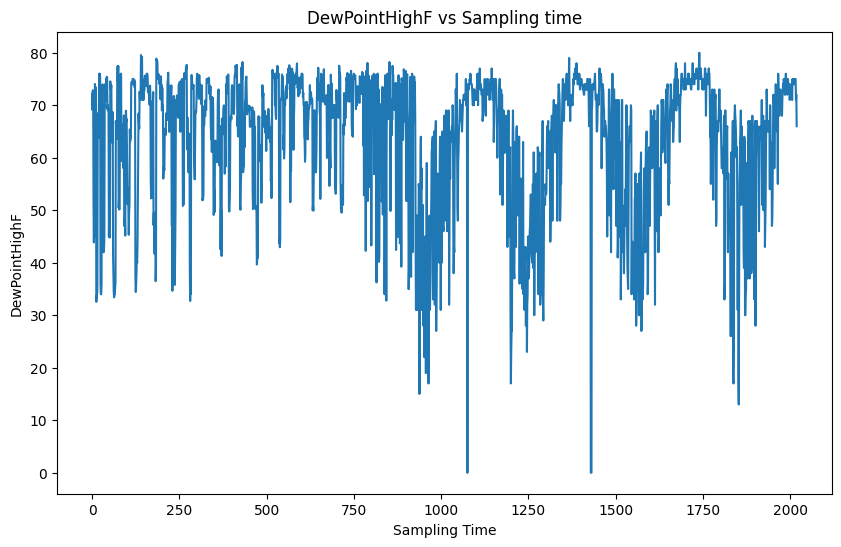

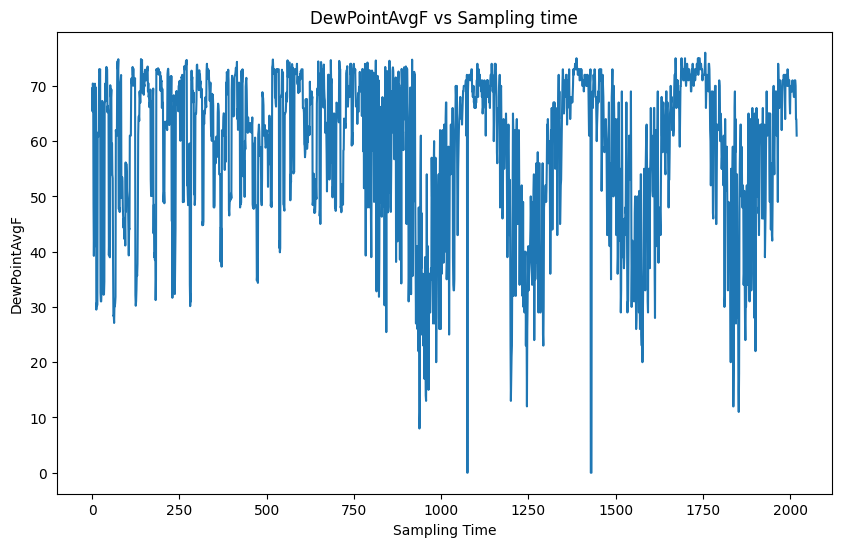

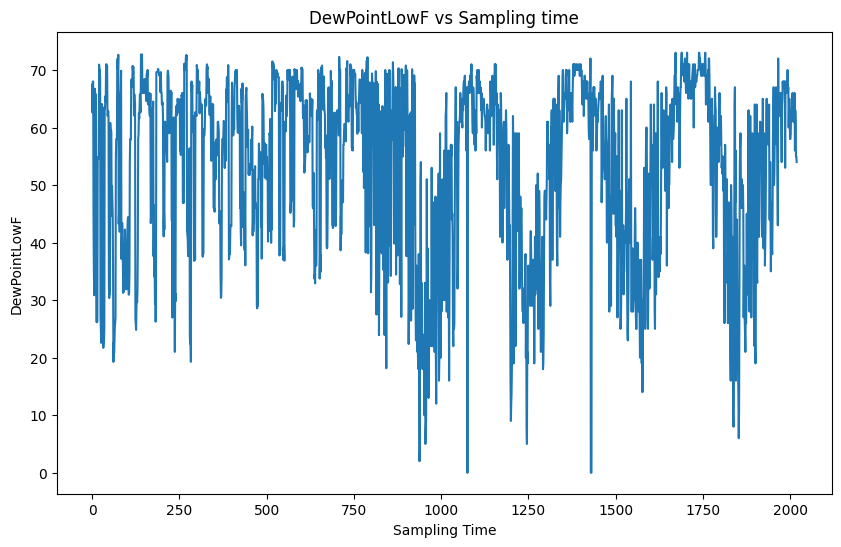

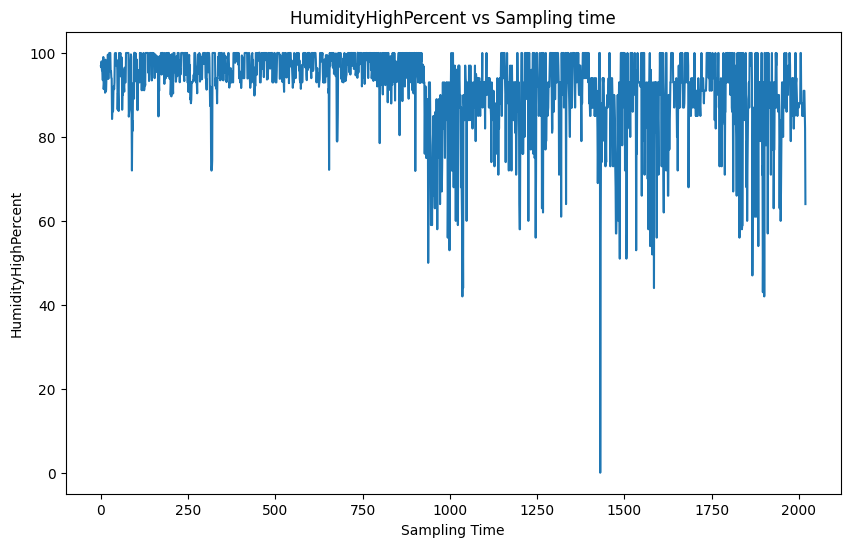

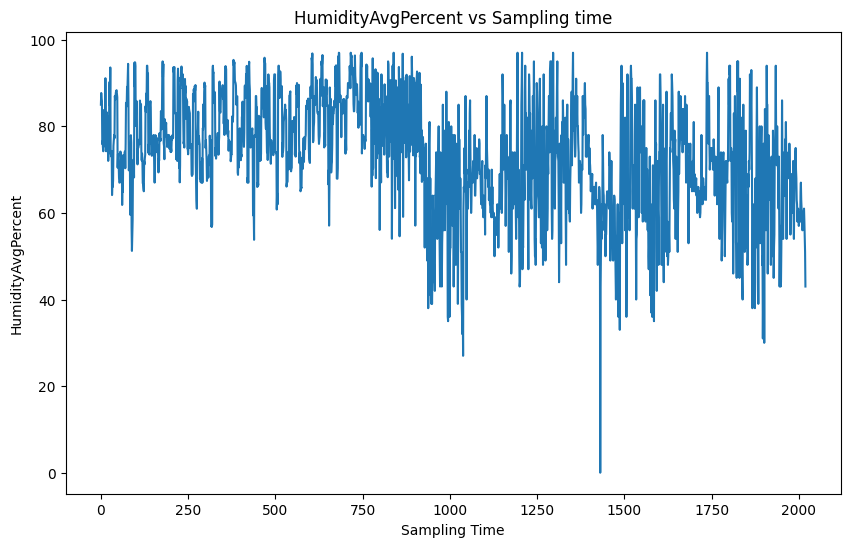

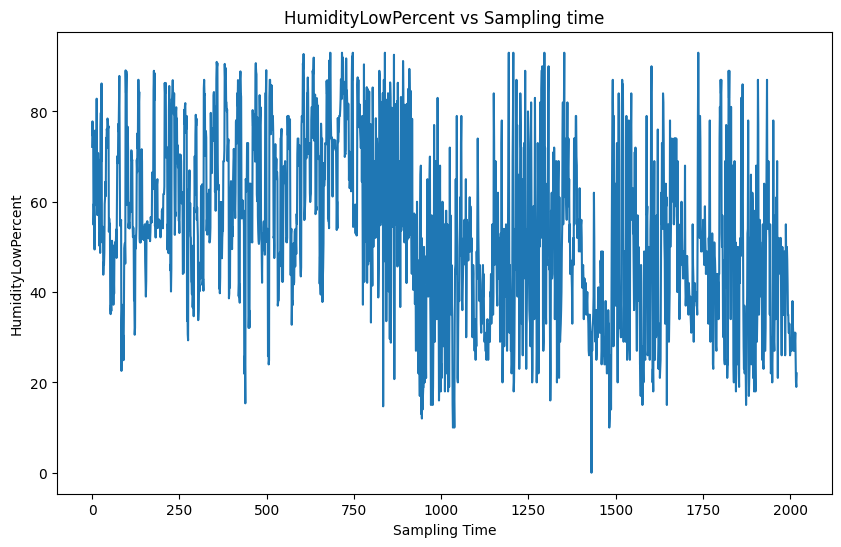

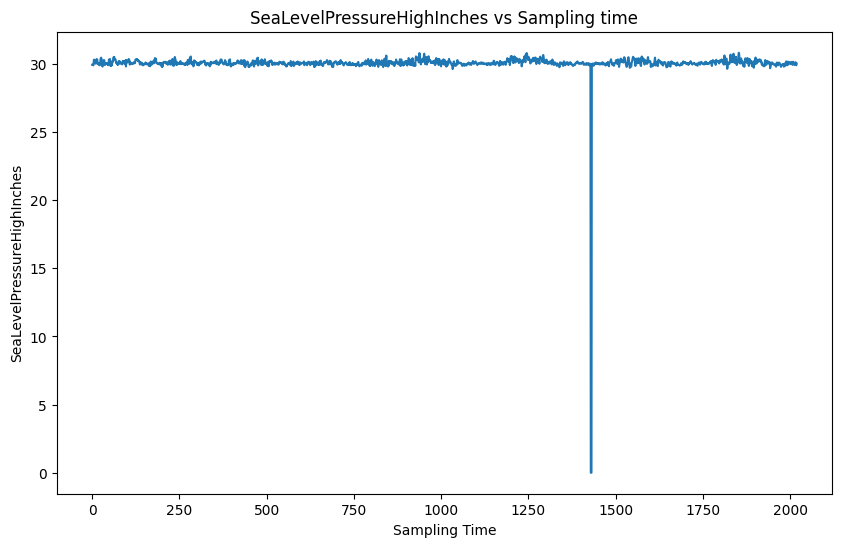

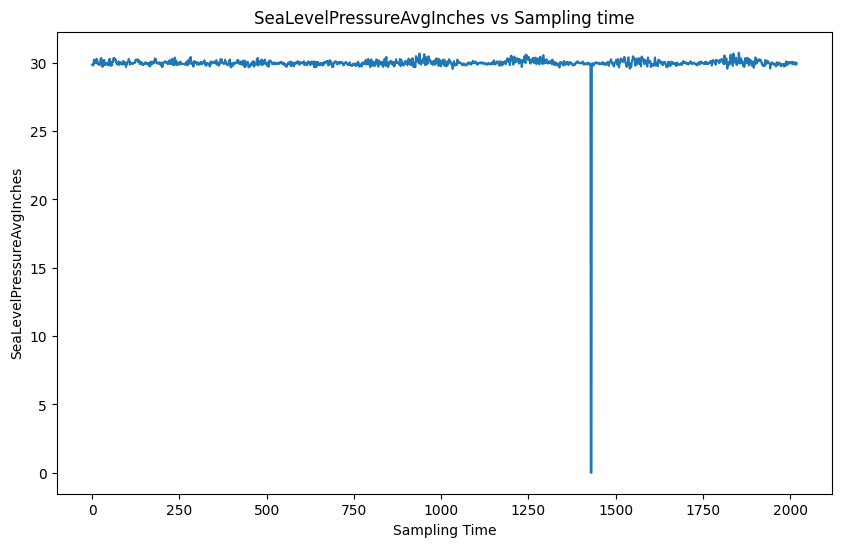

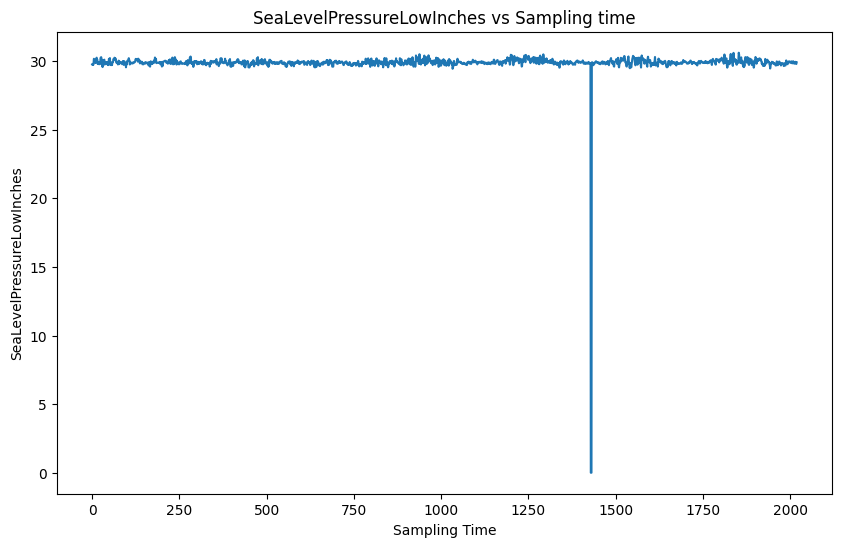

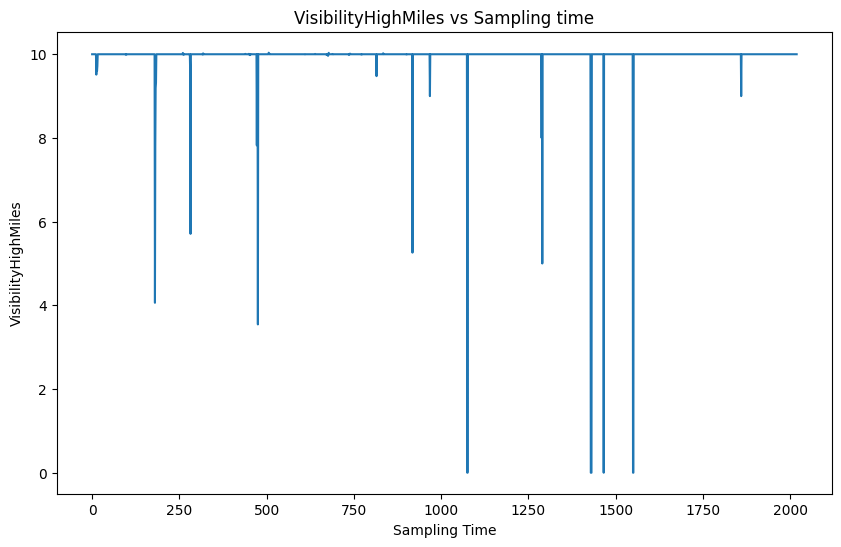

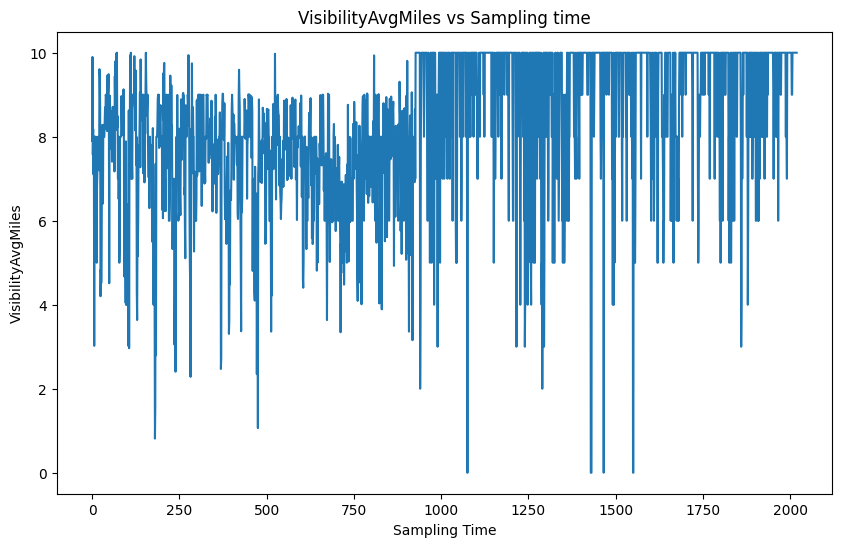

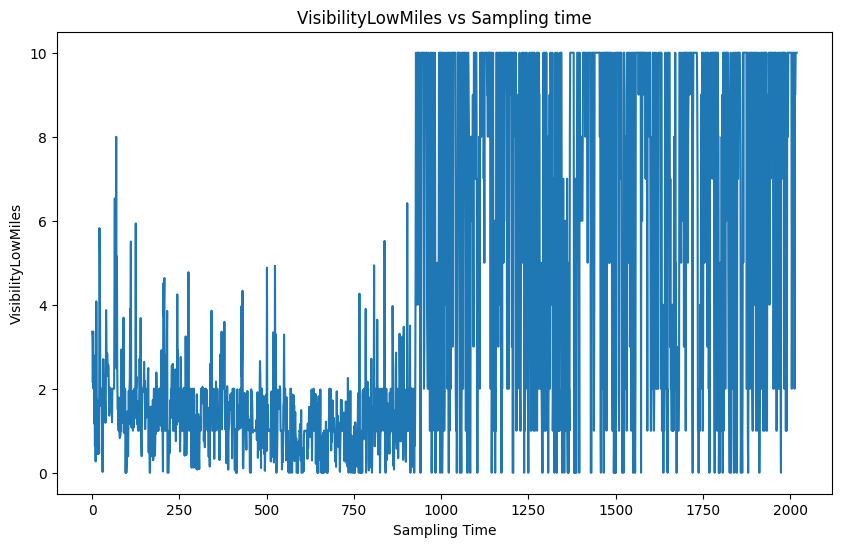

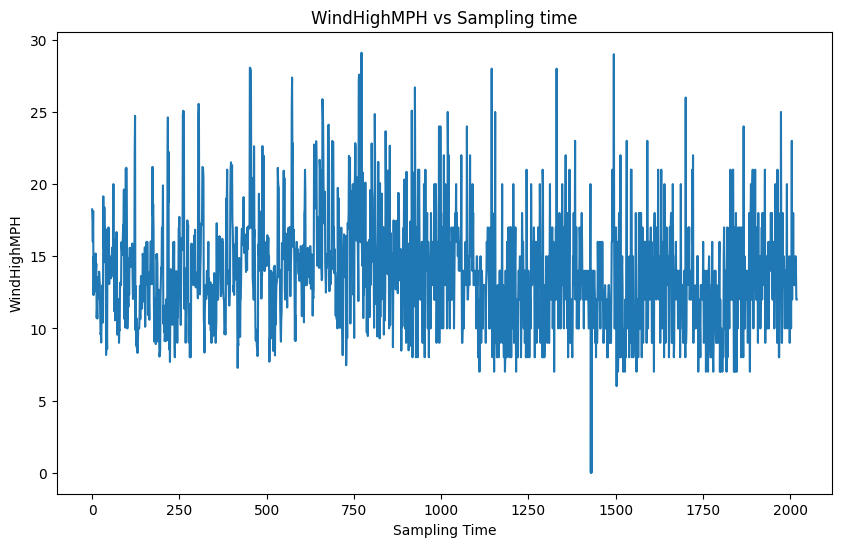

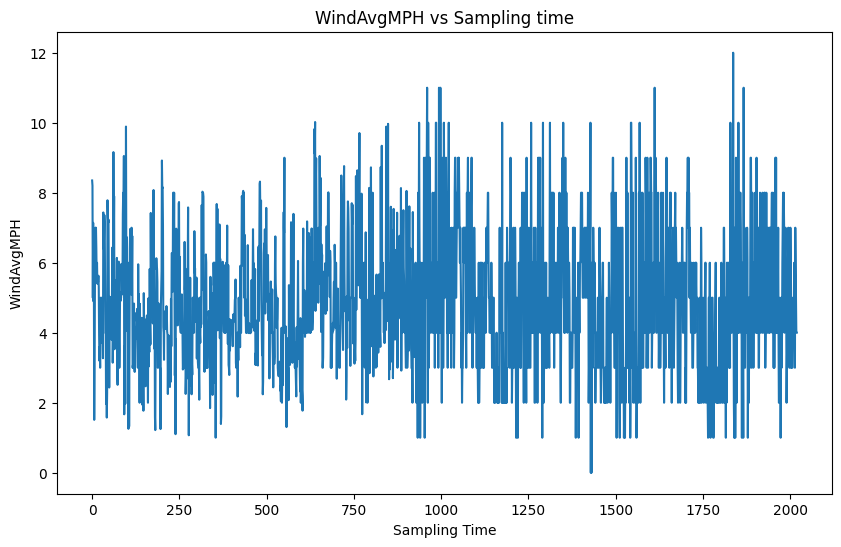

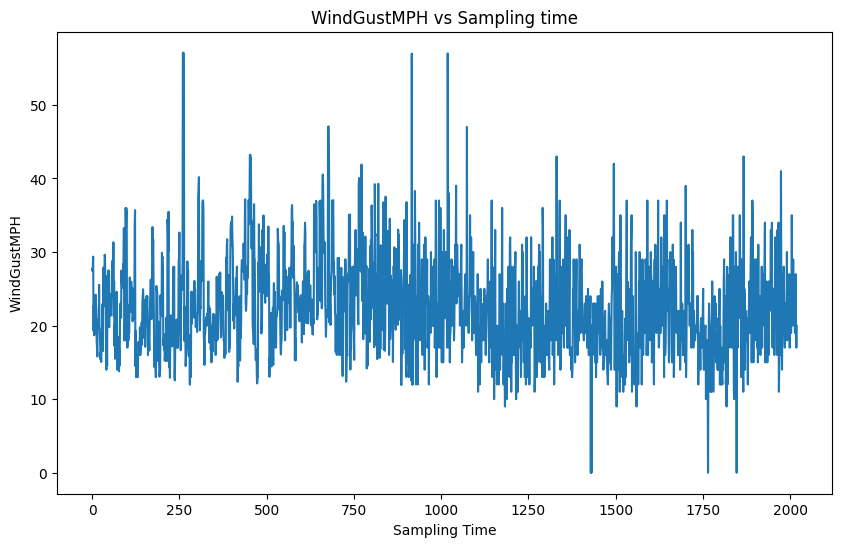

In [45]:

for col in x.columns:
  if col!='constant':
    fig, ax=plt.subplots(figsize=(10,6))
    ax.plot(date, x[col],label=col)
    ax.set_title(f'{col} vs Sampling time')
    ax.set_xlabel('Sampling Time')
    ax.set_ylabel(col)
    plt.show()





